In [1]:
import os
import glob
import pickle
import numpy as np

In [2]:
pkl_paths = glob.glob('../../plots/gita/cross_full_nolinearkeys/embedding_analysis/**/ALL/stats/*.pkl', recursive=True)

<Figure size 640x480 with 0 Axes>

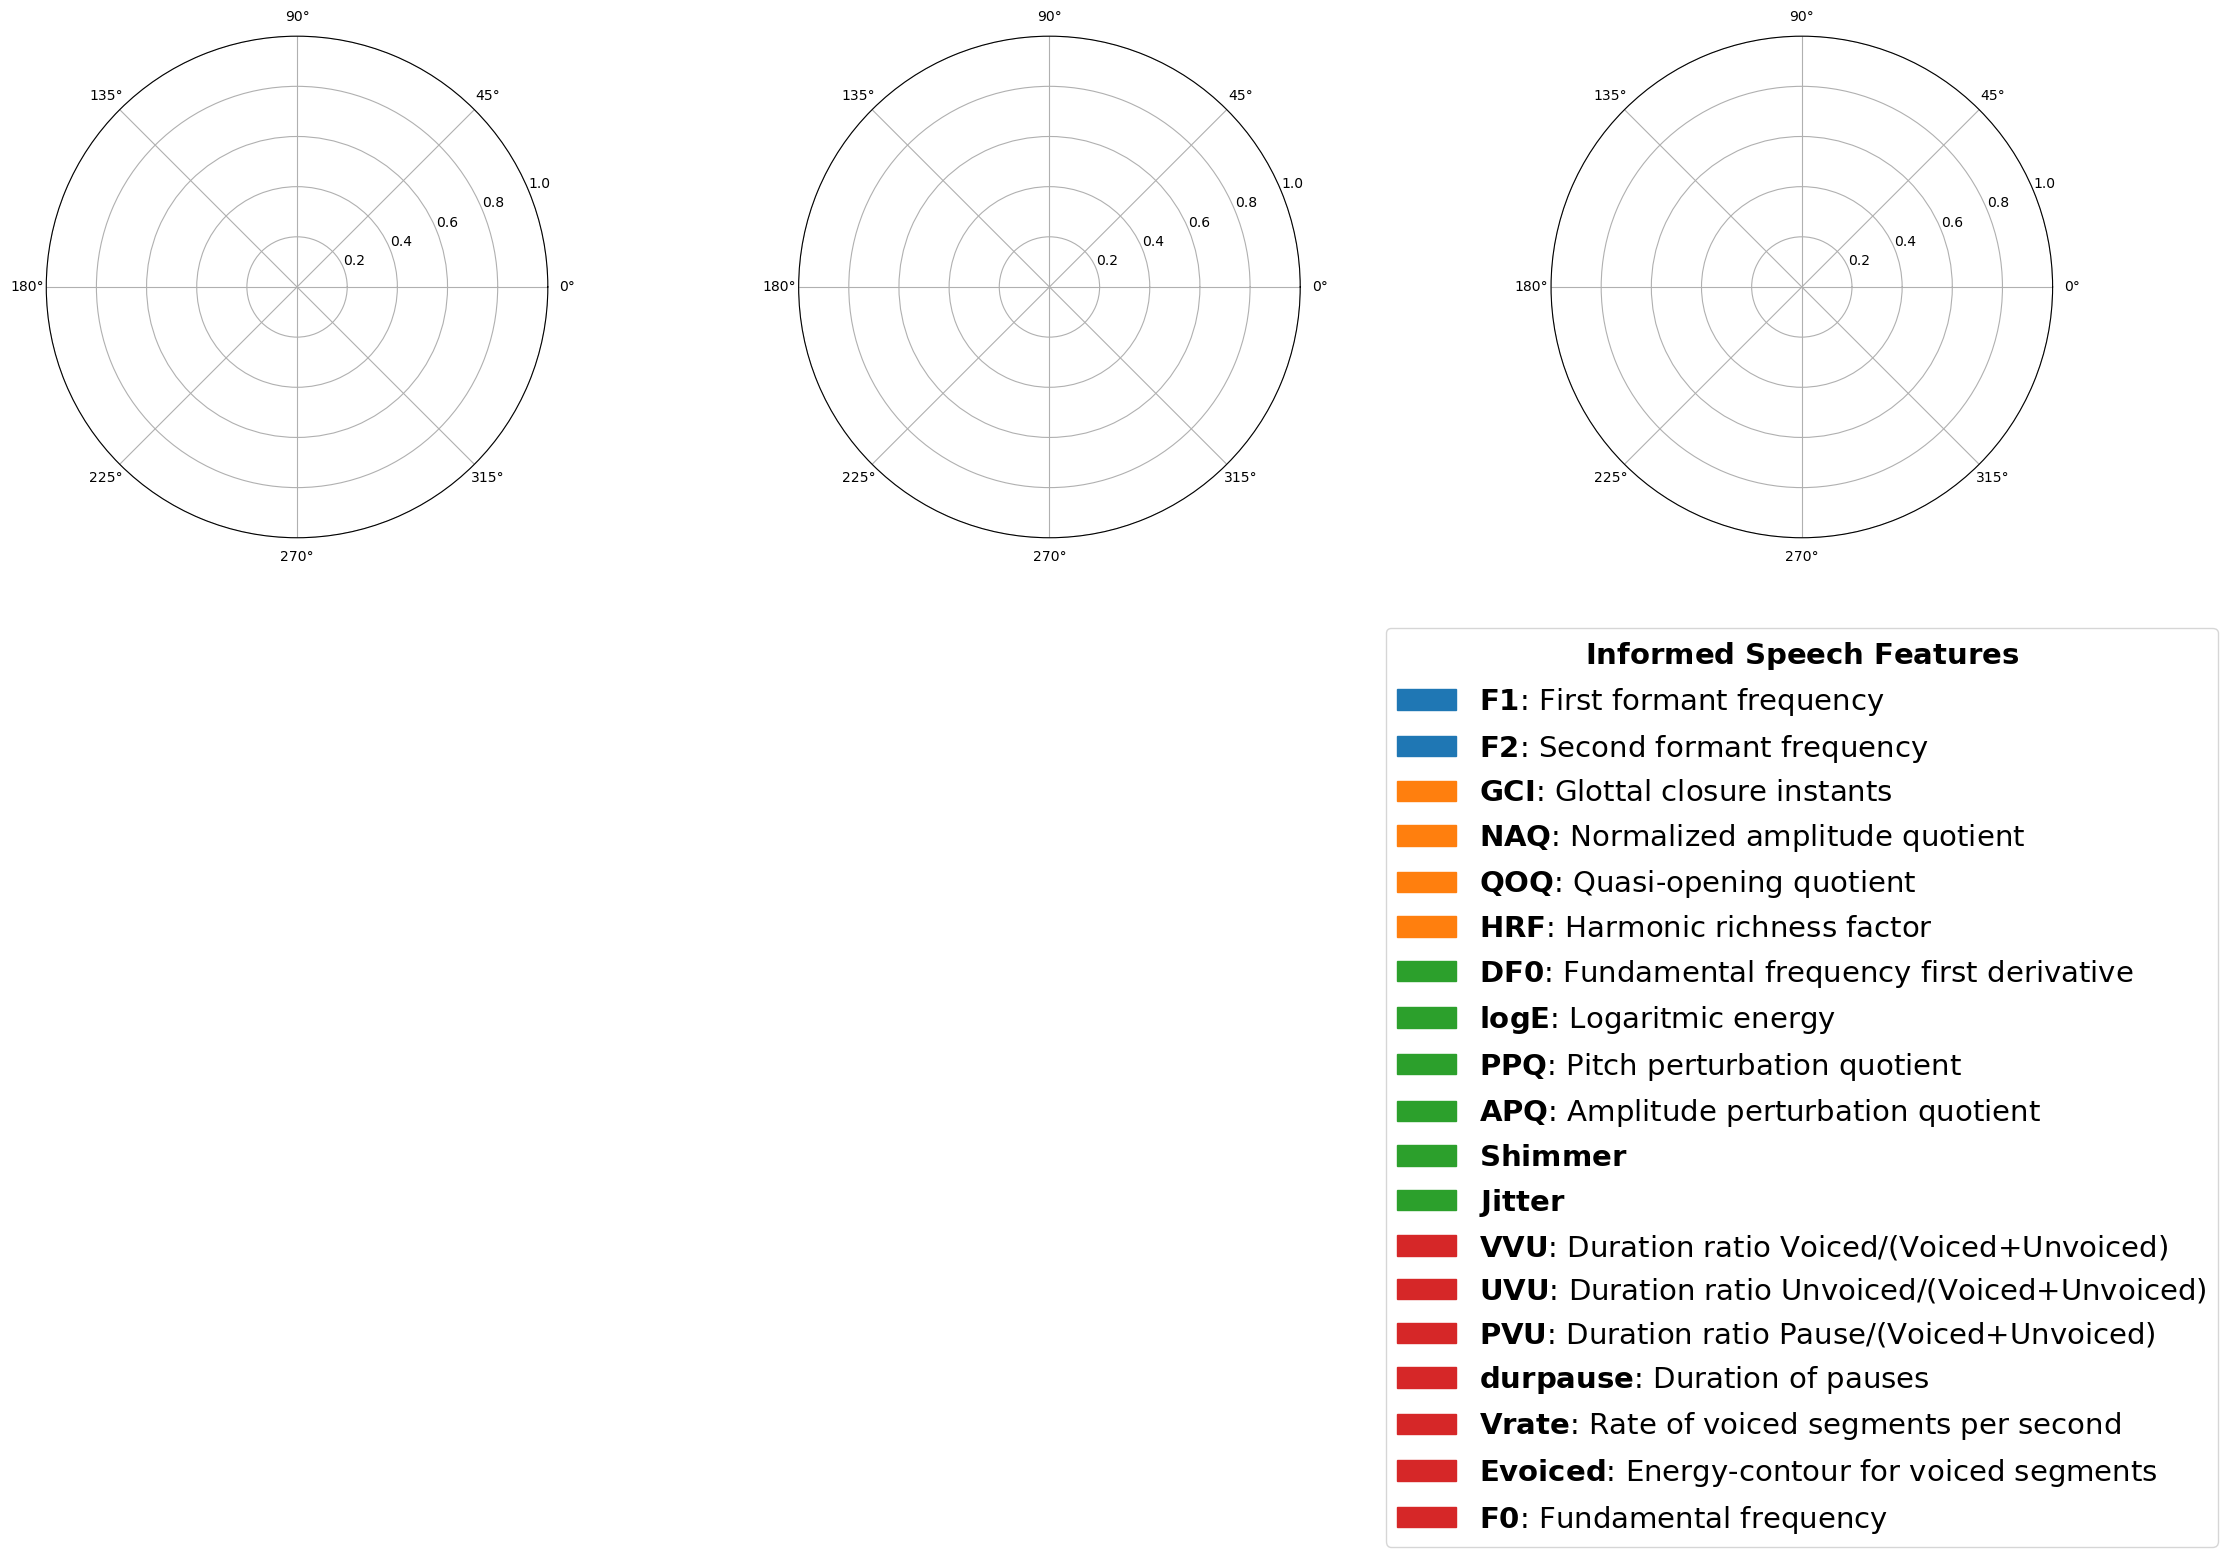

In [44]:
datas = {}
for pkl_path in pkl_paths:
    task_id = pkl_path.split(os.path.sep)[6]
    if task_id in ['MODULATED-VOWELS']:
        continue
    with open(pkl_path, 'rb') as handle:
        task_data = pickle.load(handle)
        datas[task_id] = task_data
        
create_polarplot(datas, sorted_keys=['SUSTAINED-VOWELS', 'WORDS', 'DDK'])

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import colors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [43]:
def create_polarplot(datas, sorted_keys):
    # -- saving polar plot
    plt.figure()
    
    fig, ax = plt.subplots(1, 3, subplot_kw=dict(projection='polar'), figsize=(21,7))
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.5)
    
    ax_idxs = [(0,0), (0,1), (0,2)] #, (1,0), (1,1), (1,2)]
    # ax_idxs = [(0,0), (0,1), (0,2), (0,3), (1,0), (1,1), (1,2)]
    """
    for task_id, (nrow, ncol) in zip(sorted_keys, ax_idxs):
        task_data = datas[task_id]
        polarplot_data = task_data['polarplot']
        highlevel_groups = [highlevel_group for highlevel_group, _ in task_data['informed_ids']]

        # ax[nrow, ncol].set_title(r'$\bf{'+task_id+'}$')
        # add_task_polarplot(ax[nrow, ncol], polarplot_data, highlevel_groups)
        
        ax[ncol].set_title(r'$\bf{'+task_id+'}$', size=20)
        add_task_polarplot(ax[ncol], polarplot_data, highlevel_groups)
    """
        
    # lgd = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(.5, 1.15), title=r'$\bf{Condition}$')

    f1_patch = mpatches.Patch(color='#1f77b4', label=r'$\bf{F1}$: First formant frequency')
    f2_patch = mpatches.Patch(color='#1f77b4', label=r'$\bf{F2}$: Second formant frequency')
    
    gci_patch = mpatches.Patch(color='#ff7f0e', label=r'$\bf{GCI}$: Glottal closure instants')
    naq_patch = mpatches.Patch(color='#ff7f0e', label=r'$\bf{NAQ}$: Normalized amplitude quotient')
    qoq_patch = mpatches.Patch(color='#ff7f0e', label=r'$\bf{QOQ}$: Quasi-opening quotient')
    hrf_patch = mpatches.Patch(color='#ff7f0e', label=r'$\bf{HRF}$: Harmonic richness factor')
    
    df0_patch = mpatches.Patch(color='#2ca02c', label=r'$\bf{DF0}$: Fundamental frequency first derivative')
    loge_patch = mpatches.Patch(color='#2ca02c', label=r'$\bf{logE}$: Logaritmic energy')
    ppq_patch = mpatches.Patch(color='#2ca02c', label=r'$\bf{PPQ}$: Pitch perturbation quotient')
    apq_patch = mpatches.Patch(color='#2ca02c', label=r'$\bf{APQ}$: Amplitude perturbation quotient')
    shimmer_patch = mpatches.Patch(color='#2ca02c', label=r'$\bf{Shimmer}$')
    jitter_patch = mpatches.Patch(color='#2ca02c', label=r'$\bf{Jitter}$')
    
    vvu_patch = mpatches.Patch(color='#d62728', label=r'$\bf{VVU}$: Duration ratio Voiced/(Voiced+Unvoiced)')
    uvu_patch = mpatches.Patch(color='#d62728', label=r'$\bf{UVU}$: Duration ratio Unvoiced/(Voiced+Unvoiced)')
    pvu_patch = mpatches.Patch(color='#d62728', label=r'$\bf{PVU}$: Duration ratio Pause/(Voiced+Unvoiced)')
    durpause_patch = mpatches.Patch(color='#d62728', label=r'$\bf{durpause}$: Duration of pauses')
    vrate_patch = mpatches.Patch(color='#d62728', label=r'$\bf{Vrate}$: Rate of voiced segments per second')
    evoiced_patch = mpatches.Patch(color='#d62728', label=r'$\bf{Evoiced}$: Energy-contour for voiced segments')
    f0_patch = mpatches.Patch(color='#d62728', label=r'$\bf{F0}$: Fundamental frequency')
    

    uff = [f1_patch, f2_patch, gci_patch, naq_patch, qoq_patch, hrf_patch, df0_patch, loge_patch, ppq_patch, apq_patch, shimmer_patch, jitter_patch, vvu_patch, uvu_patch, pvu_patch, durpause_patch, vrate_patch, evoiced_patch, f0_patch] 
    
    lgd2 = plt.legend(handles=uff, fontsize=21, loc='upper center', bbox_to_anchor=(.5, -0.15), ncol=1, title=r'$\bf{Informed~Speech~Features}$')
    lgd2.get_title().set_fontsize('21')
    
    # plt.gca().add_artist(lgd)
    plt.savefig('here.png', bbox_inches='tight', dpi=150)
    plt.show()
    None

In [5]:
def add_task_polarplot(ax, polarplot_data, highlevel_groups):
    first_key = list(polarplot_data.keys())[0]
    
    N = len(polarplot_data[first_key]['informed_ids'])

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1], polarplot_data[first_key]['informed_ids'], color='black', size=12)
    ax.tick_params(axis='x', which='major', pad=27)

    ax.set_rlabel_position(0)
    ax.set_yticks([20,40,60,80,100], ['20%', '40%', '60%', '80%', '100%'], color='black', size=10)
    ax.set_ylim(0,62)
    
  
    rlabels = ax.get_xmajorticklabels()
    colors = {'articulation': '#1f77b4', 'glottal': '#ff7f0e', 'phonation': '#2ca02c', 'prosody': '#d62728'}
    for highlevel_group, label in zip(highlevel_groups, rlabels):
        label.set_color( colors[highlevel_group]  )

    new_rlabels = [label.get_text().replace('average', 'avg').replace('global ', '') for label in rlabels]
    ax.set_xticklabels(new_rlabels)
    
    colors = ['#81cfe0', '#6a89cc']
    for i, condition in enumerate(polarplot_data):
        values = polarplot_data[condition]['attributions']
        values += values[:1]

        ax.plot(angles, values, color=colors[i], linewidth=1.5, marker='o', linestyle='solid', label=condition)
        ax.fill(angles, values, color=colors[i], alpha=0.2)

    # lgd = ax.legend(loc='lower center', ncol=2, bbox_to_anchor=(.5, 1.15), title=r'$\bf{Condition}$')

    # blue_patch = mpatches.Patch(color='#1f77b4', label='articulation')
    # orange_patch = mpatches.Patch(color='#ff7f0e', label='glottal')
    # green_patch = mpatches.Patch(color='#2ca02c', label='phonation')
    # red_patch = mpatches.Patch(color='#d62728', label='prosody')

    # lgd2 = plt.legend(handles=[blue_patch, orange_patch, green_patch, red_patch], loc='upper center', bbox_to_anchor=(.5, -0.15), ncol=4, title=r'$\bf{High-Level~Speech~Dimensions}$')
    # plt.gca().add_artist(lgd)